In [ ]:
/*--Set output size--*/
ods graphics / reset width=6.4in height=4.8in imagemap;


In [1]:
DATA CHIWEATHER;
/*
 * ----ASSIGMENT_2---------
 * Author: Jose L Rodriguez
 * Assigment: 2
 * Probleml:  2.2a
 * Date: September 18th, 2014
 * SAS303 - FALL 2014
 * SAS platform 'Linux LIN X64 2.6.32-431.11.2.el6.x86_64' 
 * SAS version '9.04.01M1P12042013' 
 *
 */
PROC IMPORT OUT=WORK.WEATHER DATAFILE="/folders/myfolders/SAS-Programming/HW_2/Weather.xls" DBMS=xls replace;
	Sheet="Sheet 1";
    Getnames=yes;
RUN;
PROC MEANS DATA=WORK.WEATHER MEAN STD VAR CLM;
VAR MaxTemperatureF MeanTemperatureF MinTemperatureF;
TITLE "MAX, MEAN AND MIN TEMPERATURE FOR CHICAGO";
RUN;

/*
Why do you think the standard deviation (or variance) is so big for all three and in
particular for the average high temperature?

tandard deviation (SD) (represented by the Greek letter sigma, 
σ) measures the amount of variation or dispersion from the average.[1] 
a high standard deviation indicates that the data points are 
spread out over a large range of values. In this case the difference between the
high temperatures in the city of Chicago are large therefore we get a large STD.


*/


Variable,Label,Mean,Std Dev,Variance,Lower 95%CL for Mean,Upper 95%CL for Mean
MaxTemperatureF MeanTemperatureF MinTemperatureF,MaxTemperatureF MeanTemperatureF MinTemperatureF,58.9527596 50.4520356 41.7906922,21.3283791 19.7491208 18.8462767,454.8997561 390.0277714 355.1821449,58.3133045 49.8597903 41.2256541,59.5922147 51.0442809 42.3557304


In [2]:
DATA WINTER;
/*
 * ----ASSIGMENT_2---------
 * Author: Jose L Rodriguez
 * Assigment: 2
 * Probleml:  2.2b
 * Date: September 18th, 2014
 * SAS303 - FALL 2014
 * SAS platform 'Linux LIN X64 2.6.32-431.11.2.el6.x86_64' 
 * SAS version '9.04.01M1P12042013' 
 *
 */
 
SET WORK.WEATHER;
WHERE MONTH = "DEC" OR MONTH="JAN" OR MONTH="FEB";
PROC SORT DATA=WINTER;
BY MONTH;
PROC MEANS DATA=WINTER MEAN STD CLM;
VAR MeanTemperatureF;
TITLE "CHICAGO WINTER";
RUN;

/** 
   Why is the standard deviation smaller on the winter months than the entire year?
	As we know the STD measures the amount of variation or dispersion from the average. 
	a low standard deviation indicates that the data points tend to be very 
	close to the mean or expected value. Meaning that during the winter months the 
	climate has a more stady temperatures withour much variation.
**/



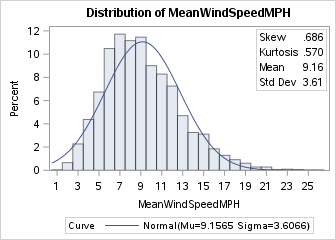
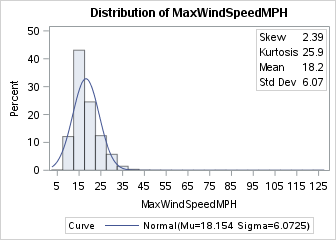
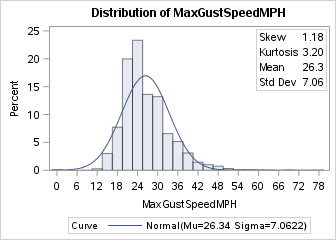

In [12]:
DATA WEATHER_HISTOGRAMS;

/*
 * ----ASSIGMENT_2---------
 * Author: Jose L Rodriguez
 * Probleml:  2.2c
 * Date: September 18th, 2014
 * SAS303 - FALL 2014
 * SAS platform 'Linux LIN X64 2.6.32-431.11.2.el6.x86_64' 
 * SAS version '9.04.01M1P12042013' 
 * 
 * Histogram#1 for Mean Wind Speed MPH variable
 * Histogram#2 for Max Wind Speed MPH variable
 * Histogram#3 for Max Gust Speed MPH variable
 */
Proc Univariate Data = WORK.WEATHER NOPRINT;
Title "MEAN WIND SPEED MPH";
   histogram MeanWindSpeedMPH /NORMAL;
   inset  	skewness = "Skew" (4.3)  
		 	Kurtosis = "Kurtosis" (4.3)
			mean = "Mean" (4.3)
			std="Std Dev" (4.3)/ 				
			Pos = NE
			Height = 4;
Run;
Proc Univariate Data = WORK.WEATHER NOPRINT;
Title "MAX WIND SPEED MPH";
   histogram MaxWindSpeedMPH /NORMAL;
   inset  	skewness = "Skew" (4.3)  
		 	Kurtosis = "Kurtosis" (4.3)
			mean = "Mean" (4.3)
			std="Std Dev" (4.3)/ 				
			Pos = NE
			Height = 4;
Run;
Proc Univariate Data = WORK.WEATHER NOPRINT;
Title "MAX GUST SPEED MPH";
   histogram MaxGustSpeedMPH /NORMAL;
   inset  	skewness = "Skew" (4.3)  
		 	Kurtosis = "Kurtosis" (4.3)
			mean = "Mean" (4.3)
			std="Std Dev" (4.3)/ 				
			Pos = NE
			Height = 4;
Run;

/*
 * Histogram_1 - Mean Wind Speed 
 *
 *****Skew description******
 * Skewness - indicates symmetry of the distribution.
 * Skew > 0 --- skew right, tail longer on right.
 *
 *****Kurtosis description*****
 * Kurtosis -  fourth moment, indicates how flat or peaked data
 * Kurtosis > 0 - Leptokurtic - Peaked/Fat tails
 *
 * Histogram_2 - Max Wind Speed
 *
 *****Skew description******
 * Skewness - indicates symmetry of the distribution.
 * Skew > 0 --- skew right, tail longer on right.
 *****Kurtosis description*****
 * Kurtosis -  fourth moment, indicates how flat or peaked data
 * Kurtosis > 0 - Leptokurtic - Peaked/Fat tails
 *
 * Histogram_3 - Max Gust Speed
 *
 *****Skew description******
 * Skewness - indicates symmetry of the distribution.
 * Skew > 0 --- skew right, tail longer on right.
 *****Kurtosis description*****
 * Kurtosis -  fourth moment, indicates how flat or peaked data
 * Kurtosis > 0 - Leptokurtic - Peaked/Fat tails
 *
 */


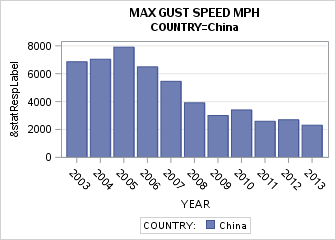
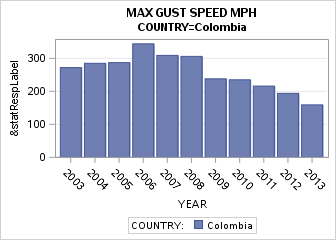
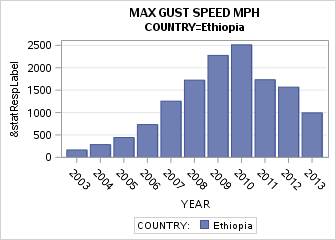
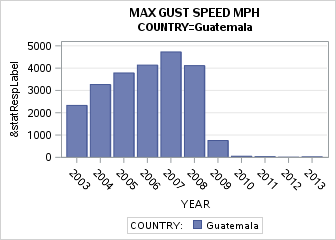
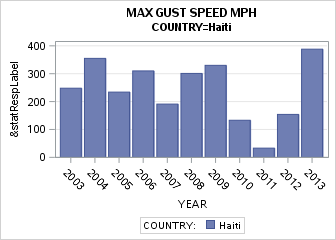
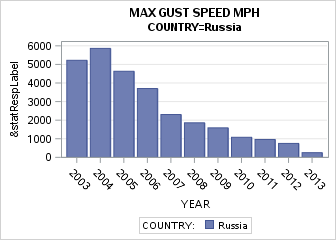
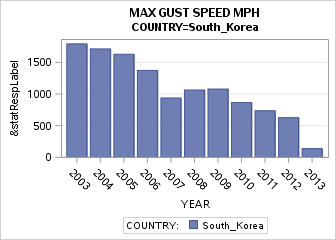
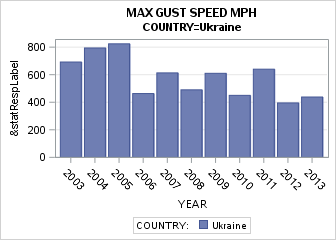
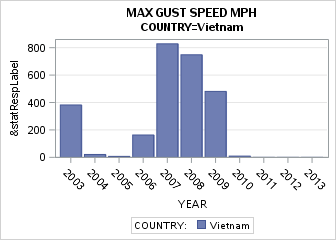

In [13]:

DATA ADOPTION;
/*
 * ----ASSIGMENT_2---------
 * Author: Jose L Rodriguez
 * Assigment: 2
 * Probleml:  3.1a
 * Date: September 18th, 2014
 * SAS303 - FALL 2014
 * SAS platform 'Linux LIN X64 2.6.32-431.11.2.el6.x86_64' 
 * SAS version '9.04.01M1P12042013' 
 *
 * Open and external file adoption.txt
 * 
 */ 
INFILE "/folders/myfolders/SAS-Programming/HW_2/adoption.txt";
LENGTH COUNTRY$ 12;
INPUT COUNTRY$ YEAR NUM_OF_ADOPTIONS; *VARIABLES NAMES;
/*proc print data=ADOPTION; *print all the data from the external file;
title "TOTAL INTERNATIONAL ADOPTION FROM 2003 TO 2013";
run;*/
/*--Sort data by BY variable--*/
proc sort data=WORK.ADOPTION out=BAR_CHART;
    by COUNTRY;
run;


/*--SGPLOT proc statement--*/
proc sgplot data=BAR_CHART noautolegend;
    /*--BY Variable--*/
    by COUNTRY;

    /*--Bar chart settings--*/
    vbar YEAR / response=NUM_OF_ADOPTIONS group=COUNTRY groupdisplay=Cluster 
        transparency=0.00 stat=Mean dataskin=None name='Bar';

    /*--Category Axis--*/
    xaxis;

    /*--Response Axis--*/
    yaxis grid label="&statRespLabel";

    /*--Legend Settings--*/
    keylegend 'Bar' / title='COUNTRY:' location=Outside;
run;


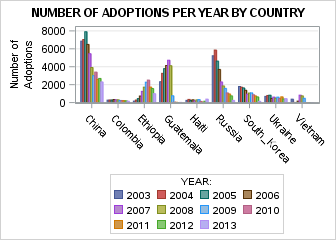

In [11]:
DATA ADOPTIONS_PER_YEAR;
/*
 * ----ASSIGMENT_2---------
 * Author: Jose L Rodriguez
 * Assigment: 2
 * Probleml:  3.1b
 * Date: September 18th, 2014
 * SAS303 - FALL 2014
 * SAS platform 'Linux LIN X64 2.6.32-431.11.2.el6.x86_64' 
 * SAS version '9.04.01M1P12042013' 
 *
 * Get file to create vertical Bar charts 
 * Vertical chart for number of adoptions per year by country
 */ 
 
SET WORK.ADOPTION;
/*--Sort data by BY variable--*/
proc sort data=ADOPTIONS_PER_YEAR out=VAR_CHART;
    by COUNTRY;
run;

/*--Set output size--*/
ods graphics / reset width=3.5in height=2.5in imagemap;

/*--SGPLOT proc statement--*/
proc sgplot data=VAR_CHART noautolegend;
Title "NUMBER OF ADOPTIONS PER YEAR BY COUNTRY";
    /*--Bar chart settings--*/
    vbar COUNTRY / response=NUM_OF_ADOPTIONS group=YEAR groupdisplay=Cluster 
        transparency=0.00 stat=Sum dataskin=None name='Bar';

    /*--Category Axis--*/
    xaxis display=(nolabel) discreteorder=data;

    /*--Response Axis--*/
    yaxis grid label="Number of Adoptions";

    /*--Legend Settings--*/
    keylegend 'Bar' / title='YEAR:' location=Outside;
run;

Variable,Sum
YEAR NUM_OF_ADOPTIONS,126378.00 116507.00

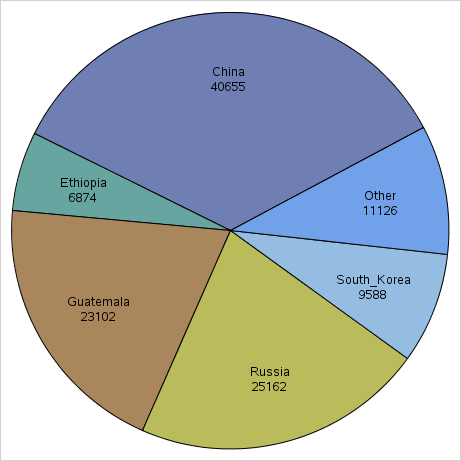

In [6]:
DATA PIE_CHART_ADOPTIONS;
/*
 * ----ASSIGMENT_2---------
 * Author: Jose L Rodriguez
 * Assigment: 2
 * Probleml:  3.1c
 * Date: September 18th, 2014
 * SAS303 - FALL 2014
 * SAS platform 'Linux LIN X64 2.6.32-431.11.2.el6.x86_64' 
 * SAS version '9.04.01M1P12042013' 
 * 
 * Create a pie chart for by country with the number of adoptions
 */

SET WORK.ADOPTION;
WHERE YEAR=2003 OR YEAR=2004 OR YEAR=2005 OR YEAR=2006 OR YEAR=2007 
	  OR YEAR=2008 OR YEAR=2009;
proc sort data=PIE_CHART_ADOPTIONS out=PIE_CHART;
    by COUNTRY;
run;

PROC MEANS DATA=PIE_CHART SUM;
%let start=90;
/*--Compute number of unique values for category variable--*/
proc sql ;
    create table _PieCount_ as select count(distinct(COUNTRY)) as catcount from 
        WORK.PIE_CHART;
quit;

/*--Read cat Count into macro variable--*/
data _null_;
    set _PieCount_ end=last;
    call symputx ("CatCount", catcount);
run;

/*--Macro for summarized data--*/
%macro summarizeMacro ();
    %if &CatCount gt 0 %then
        %do;

            /*--If NUM_OF_ADOPTIONS is assigned use proc means to find size of first slice--*/
            proc means data=WORK.PIE_CHART noprint;
                class COUNTRY / order=data;
                var NUM_OF_ADOPTIONS;
                output out=_PieMeans_ n=N sum=Sum;
            run;

            data _null_;
                set _PieMeans_(where=(_type_=1)) end=last;
                retain val1 val2 0;

                if _n_ eq 1 then
                    val1=Sum;
                else
                    val2=sum (val2, Sum);

                if last then
                    do;

                        if (val1+val2) > 0 then
                            do;
                                offset=int(180*val1/(val1+val2));
                                start=90 - offset;

                                if start < 0 then
                                    start=360+start;
                            end;
                        else
                            start=0;
                    end;
                call symputx ("start", start);
            run;

        %end;
%mend summarizeMacro;

%summarizeMacro ();

/*--Define Pie Template--*/
proc template ;
    define statgraph WebOne.Pie;
        begingraph;
        layout region;
        piechart category=COUNTRY response=NUM_OF_ADOPTIONS / dataskin=None 
            datatransparency=0.00 categorydirection=counterclockwise 
            start=&start
        datalabellocation=Auto datalabelattrs=(size=10);
        endlayout;
        endgraph;
    end;
run;

/*--Set output size--*/
ods graphics / reset width=4.8in height=4.8in imagemap tipmax=100000 
    antialiasmax=100000;

/*--SGRENDER proc statement--*/
proc sgrender data=WORK.PIE_CHART template=WebOne.Pie;
Title "NUMBER OF TOTAL ADOPTIONS BY COUNTRY";
run;


In [10]:
DATA SCATTER_ADOPTIONS;
/*
 * ----ASSIGMENT_2---------
 * Author: Jose L Rodriguez
 * Assigment: 2
 * Probleml:  3.d
 * Date: September 18th, 2014
 * SAS303 - FALL 2014
 * SAS platform 'Linux LIN X64 2.6.32-431.11.2.el6.x86_64' 
 * SAS version '9.04.01M1P12042013' 
 *
 * Set data path to work.adoption where the data is located.
 * choose just the countries that we want and sort the data by country\
 * and create a scatter plot.
 */ 
SET WORK.ADOPTION;
where country= "China" OR country="Russia" OR country ="Ethiopia" OR country ="Guatemala";

/*--Sort data by BY variable--*/

proc sort data=SCATTER_ADOPTIONS out=SCATTER_CHART;
    by COUNTRY;
run;

PROC PRINT DATA=SCATTER_ADOPTIONS(OBS=5);
RUNS;


Obs,COUNTRY,YEAR,NUM_OF_ADOPTIONS
1,China,2003,6857
2,China,2004,7038
3,China,2005,7903
4,China,2006,6492
5,China,2007,5453


Time Series
----------------------